In [28]:
import pandas as pd
import numpy as np
import pylab
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')
from get_historical_prices import HistoricalPrices

In [2]:
hp = HistoricalPrices(prices_dir='../prices')
hp.get_prices()
prices = hp.prices

100%|██████████| 965/965 [00:49<00:00, 12.06it/s]


In [3]:
prices.head()

high        low   adjclose      volume
ticker date                                                   
CSCO   2012-01-03  18.860001  18.480000  14.852622  41236600.0
       2012-01-04  19.000000  18.350000  15.139630  52927700.0
       2012-01-05  19.000000  18.670000  15.083825  37865300.0
       2012-01-06  19.000000  18.830000  15.028019  27796900.0
       2012-01-09  19.100000  18.790001  15.123683  37811500.0

In [4]:
pivoted_prices = prices.reset_index(level=0).pivot(columns='ticker', values='adjclose').dropna(axis=1)
print(pivoted_prices.shape)
pivoted_prices.head()

(1896, 795)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XPO,XRAY,XRX,XYL,Y,YUM,ZBRA,ZG,ZION,ZNGA
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,24.242914,20.893423,4.877474,68.042702,51.464207,33.846745,18.250000,22.961781,31.544683,12.493333,...,11.84,33.780727,17.453468,22.564072,280.063232,34.874527,35.720001,7.193639,15.602491,9.45
2012-01-04,24.050198,21.391426,4.791737,69.637924,51.740776,33.962326,18.110001,22.872713,31.221191,12.266666,...,11.72,33.771179,17.347052,23.309027,280.200897,35.112701,35.450001,7.174930,15.946727,9.19
2012-01-05,24.588482,21.187698,5.210895,70.081047,52.315197,34.220150,18.270000,22.820084,31.439375,12.500000,...,11.73,33.799828,17.240623,22.976940,281.105408,35.380634,35.400002,7.171812,16.393312,8.91
2012-01-06,24.854307,20.734968,5.334737,70.405983,52.862103,34.309063,18.139999,22.613623,31.311480,12.486667,...,11.83,33.599327,17.240623,22.591002,281.626495,35.636677,35.110001,7.184284,16.411919,8.81
2012-01-09,25.505566,21.346159,5.449052,70.386292,52.778248,34.291283,18.209999,22.609575,31.176056,12.396667,...,11.70,33.437008,17.219339,22.680748,280.151733,35.499722,34.950001,7.181166,16.635208,8.00


In [5]:
returns = pivoted_prices.pct_change().drop(pivoted_prices.index[:1])
print(returns.shape)
returns.head()

(1895, 795)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XPO,XRAY,XRX,XYL,Y,YUM,ZBRA,ZG,ZION,ZNGA
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007949,0.023835,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.010255,-0.018143,...,-0.010135,-0.000283,-0.006097,0.033015,0.000492,0.006829,-0.007559,-0.002601,0.022063,-0.027513
2012-01-05,0.022382,-0.009524,0.087475,0.006363,0.011102,0.007591,0.008835,-0.002301,0.006988,0.019022,...,0.000853,0.000848,-0.006135,-0.014247,0.003228,0.007631,-0.001410,-0.000435,0.028005,-0.030468
2012-01-06,0.010811,-0.021368,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.004068,-0.001067,...,0.008525,-0.005932,0.000000,-0.016797,0.001854,0.007237,-0.008192,0.001739,0.001135,-0.011223
2012-01-09,0.026203,0.029476,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.004325,-0.007208,...,-0.010989,-0.004831,-0.001235,0.003973,-0.005237,-0.003843,-0.004557,-0.000434,0.013605,-0.091941
2012-01-10,0.018760,0.001060,0.000000,0.000840,0.003580,0.011408,-0.002746,0.004655,0.013514,0.006453,...,0.005983,0.014277,0.002472,0.012268,0.003685,0.006206,0.009156,0.079027,0.016220,0.066250


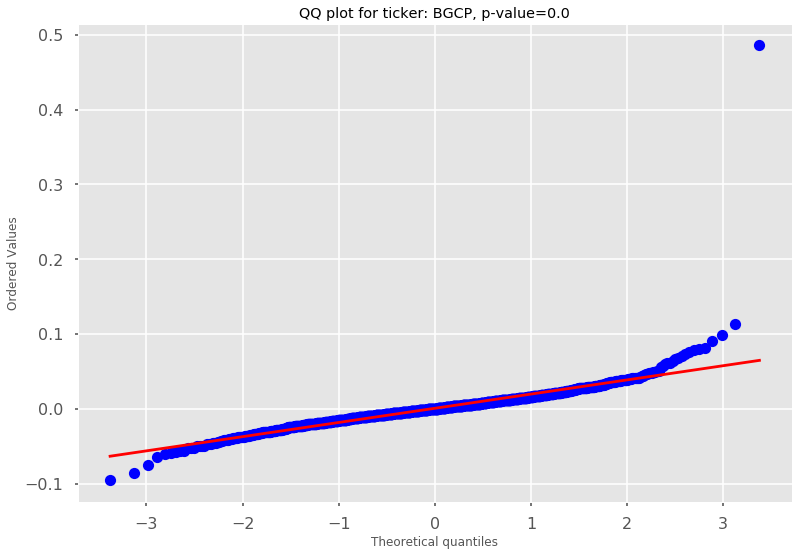

1

In [53]:
# for kicks, using normaltest() to find any possible outliers
counter = 0
for i, col in enumerate(returns.columns):
    data_ = returns[col].values
    t, p = normaltest(data_)
    if p < 10e-322:
        counter += 1
        stats.probplot(data_, dist='norm', plot=pylab)
        pylab.title('QQ plot for ticker: {}, p-value={}'.format(col, p))
        pylab.show()
        break
        
counter

In [63]:
bgcp = returns[['BGCP']].loc[returns['BGCP'] > 0.45]
pivoted_prices.loc['2013-03-29':'2013-04-09','BGCP']
returns.loc['2013-03-29':'2013-04-09','BGCP']
returns.drop('BGCP', axis=1, inplace=True)

In [64]:
len(returns.columns)

794

## Let's look at a two stock portfolio

In [65]:
tick0 = returns.columns[0]
tick1 = returns.columns[1]
asset_returns_1 = returns[tick0]
asset_returns_2 = returns[tick1]
asset_returns = pd.concat([asset_returns_1, asset_returns_2], axis=1)
asset_returns.head()

,A,AA
date,,
2012-01-04,-0.007949,0.023835
2012-01-05,0.022382,-0.009524
2012-01-06,0.010811,-0.021368
2012-01-09,0.026203,0.029476
2012-01-10,0.018760,0.001060


## Factor Returns

In [66]:
factor_return_1 = returns.mean(axis=1)
factor_return_2 = returns.median(axis=1)
factor_returns = pd.DataFrame(data={'factor_return_1': factor_return_1, 'factor_return_2': factor_return_2})
factor_returns.head()

,factor_return_1,factor_return_2
date,,
2012-01-04,-0.001606,-0.001819
2012-01-05,0.006749,0.005265
2012-01-06,-0.000627,-0.001441
2012-01-09,0.004123,0.003276
2012-01-10,0.014514,0.012434


## Factor Exposures

In [67]:
from sklearn.linear_model import LinearRegression
def get_factor_loadings(factor_returns_df, asset_returns):
    lr = LinearRegression()
    lr.fit(factor_returns_df, asset_returns)
    return lr.coef_

In [71]:
factor_loadings_asset_1 = get_factor_loadings(factor_returns, asset_returns_1)
factor_loadings_asset_2 = get_factor_loadings(factor_returns, asset_returns_2)
print(f"factor_exposures for asset 1 {factor_loadings_asset_1}")
print(f"factor_exposures for asset 2 {factor_loadings_asset_2}")

factor_exposures for asset 1 [-0.01782643  1.28086549]
factor_exposures for asset 2 [0.07938985 1.36951805]


## Variance of stock 1

Calculate the variance of stock 1.  
$\textrm{Var}(r_{1}) = \beta_{1,1}^2 \textrm{Var}(f_{1}) + \beta_{1,2}^2 \textrm{Var}(f_{2}) + 2\beta_{1,1}\beta_{1,2}\textrm{Cov}(f_{1},f_{2}) + \textrm{Var}(s_{1})$

In [75]:
factor_exposure_1_1 = factor_loadings_asset_1[0]
factor_exposure_1_2 = factor_loadings_asset_1[1]
common_return = factor_exposure_1_1 * factor_return_1 + factor_exposure_1_2 * factor_return_2
specific_return = asset_returns_1 - common_return
print(specific_return.shape)
specific_return.head()

(1895,)


date
2012-01-04   -0.005648
2012-01-05    0.015758
2012-01-06    0.012646
2012-01-09    0.022080
2012-01-10    0.003093
dtype: float64

In [79]:
factor_cov_matrix = np.cov(factor_return_1, factor_return_2, ddof=1)
print(factor_cov_matrix)
factor_1_var = factor_cov_matrix[0,0]
factor_2_var = factor_cov_matrix[1,1]
factor_cov = factor_cov_matrix[0,1]

var_s_1 = np.var(specific_return, ddof=1)

var_asset_1 = (factor_exposure_1_1**2 * factor_1_var) + (factor_exposure_1_2**2 * factor_2_var) + \
              (2 * factor_exposure_1_1 * factor_exposure_1_2 * factor_cov) + var_s_1


historical_var = np.var(asset_returns_1, ddof=1)
print(f"variance of asset 1: {var_asset_1:.8f}")
print(f"variance of asset 1: {historical_var:.8f}")

[[1.14517448e-04 6.76270539e-05]
 [6.76270539e-05 6.54064994e-05]]
variance of asset 1: 0.00022406
variance of asset 1: 0.00022406


## Variance of stock 2
Calculate the variance of stock 2.  
$\textrm{Var}(r_{2}) = \beta_{2,1}^2 \textrm{Var}(f_{1}) + \beta_{2,2}^2 \textrm{Var}(f_{2}) + 2\beta_{2,1}\beta_{2,2}\textrm{Cov}(f_{1},f_{2}) + \textrm{Var}(s_{2})$

In [80]:
factor_exposure_2_1 = factor_loadings_asset_2[0]
factor_exposure_2_2 = factor_loadings_asset_2[1]
common_return = factor_exposure_2_1 * factor_return_1 + factor_exposure_2_2 * factor_return_2
specific_return_2 = asset_returns_2 - common_return
print(specific_return_2.shape)
specific_return.head()

(1895,)


date
2012-01-04   -0.005648
2012-01-05    0.015758
2012-01-06    0.012646
2012-01-09    0.022080
2012-01-10    0.003093
dtype: float64

In [81]:
var_s_2 = np.var(specific_return_2, ddof=1)

var_asset_2 = (factor_exposure_2_1**2 * factor_1_var) + (factor_exposure_2_2**2 * factor_2_var) + \
              (2 * factor_exposure_2_1 * factor_exposure_2_2 * factor_cov) + var_s_2


historical_var = np.var(asset_returns_2, ddof=1)
print(f"variance of asset 1: {var_asset_2:.8f}")
print(f"variance of asset 1: {historical_var:.8f}")

variance of asset 1: 0.00052989
variance of asset 1: 0.00052989


## Covariance of stocks 1 and 2 with factors compared to historical
Calculate the covariance of stock 1 and 2 with factors.  
$\textrm{Cov}(r_{1},r_{2}) = \beta_{1,1}\beta_{2,1}\textrm{Var}(f_{1}) + \beta_{1,1}\beta_{2,2}\textrm{Cov}(f_{1},f_{2}) + \beta_{1,2}\beta_{2,1}\textrm{Cov}(f_{1},f_{2}) + \beta_{1,2}\beta_{2,2}\textrm{Var}(f_{2})$

In [88]:
cov_asset_1_2 = (factor_exposure_1_1 * factor_exposure_2_1 * factor_1_var) + \
            (factor_exposure_1_1 * factor_exposure_2_2 * factor_cov) + \
            (factor_exposure_1_2 * factor_exposure_2_1 * factor_cov) + \
            (factor_exposure_1_2 * factor_exposure_2_2 * factor_2_var)
hist_cov = np.cov(asset_returns_1, asset_returns_2, ddof=1)
print(hist_cov)
print(f"covariance of assets 1 and 2: {cov_asset_1_2:.8f}")
print(f"histor cov of assets 1 and 2: {hist_cov[0,1]:.8f}")

[[0.00022406 0.00012733]
 [0.00012733 0.00052989]]
covariance of assets 1 and 2: 0.00011980
histor cov of assets 1 and 2: 0.00012733


## Calculate portfolio variance


$\textrm{Var}(r_p) = x_{1}^{2} \textrm{Var}(r_1) + x_{2}^{2} \textrm{Var}(r_2) + 2x_{1}x_{2}\textrm{Cov}(r_{1},r_{2})$ 

In [93]:
weight_1 = 0.60
weight_2 = 0.40

var_portfolio = weight_1**2 * var_asset_1 + weight_2**2 * var_asset_2 + 2 * weight_1 * weight_2 * cov_asset_1_2
print(f"variance of portfolio is {var_portfolio:.8f}")

variance of portfolio is 0.00022295


## Using matrices

Create matrices $\mathbf{F}$, $\mathbf{B}$ and $\mathbf{S}$, where  
$\mathbf{F}= \begin{pmatrix}
\textrm{Var}(f_1) & \textrm{Cov}(f_1,f_2) \\ 
\textrm{Cov}(f_2,f_1) & \textrm{Var}(f_2) 
\end{pmatrix}$
is the covariance matrix of factors,  

$\mathbf{B} = \begin{pmatrix}
\beta_{1,1}, \beta_{1,2}\\ 
\beta_{2,1}, \beta_{2,2}
\end{pmatrix}$ 
is the matrix of factor exposures, and  

$\mathbf{S} = \begin{pmatrix}
\textrm{Var}(s_i) & 0\\ 
0 & \textrm{Var}(s_j)
\end{pmatrix}$
is the matrix of specific variances.  

$\mathbf{X} = \begin{pmatrix}
x_{1} \\
x_{2}
\end{pmatrix}$

Since the portfolio variance is 1 by 1 (it's a scalar), we want the matrix multiplications to create a 1 by 1 output as well.  This means we should put the row vector  
$\mathbf{X}^T = \begin{pmatrix}
x_{i} &  x_{j}
\end{pmatrix}$  
On the left, and put the column vector  
$\mathbf{X} = \begin{pmatrix}
x_{i}\\ 
x_{j}
\end{pmatrix}$  
On the right.

So we should use:

$\mathbf{X}^T(\mathbf{BFB}^T + \mathbf{S})\mathbf{X}$

In [94]:
F = factor_cov_matrix
F

array([[1.14517448e-04, 6.76270539e-05],
       [6.76270539e-05, 6.54064994e-05]])

In [95]:
B = np.array([factor_loadings_asset_1, factor_loadings_asset_2])
B

array([[-0.01782643,  1.28086549],
       [ 0.07938985,  1.36951805]])

In [96]:
S = np.diag([var_s_1, var_s_2])
S

array([[0.0001198 , 0.        ],
       [0.        , 0.00039179]])

In [98]:
X = np.array([[weight_1], [weight_2]])
X

array([[0.6],
       [0.4]])

In [102]:
mat_var_portfolio = X.T.dot(B.dot(F).dot(B.T)+S).dot(X)
print(f"portfolio variance is \n{var_portfolio:.8f}")

portfolio variance is 
0.00022295
